## I have learned this from sheriyans Coding School YT lecture 
## ANN Notes Link - https://drive.google.com/file/d/1sZhNaqK428laMp_vhBhzZCpuSqELXhDM/view

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


2026-02-02 15:04:45.544493: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.DataFrame({
    "soil_moisture": [
        0.10, 0.15, 0.20, 0.25, 0.40, 0.60, 0.35, 0.18,
        0.45, 0.05, 0.80, 0.27, 0.55, 0.70, 0.12, 0.30,
        0.22, 0.65, 0.08, 0.50, 0.33, 0.75, 0.14, 0.42,
        0.90, 0.28, 0.18, 0.58, 0.10, 0.38
    ],
    "temperature_c": [
        34, 30, 26, 22, 28, 30, 19, 22,
        35, 24, 33, 33, 21, 25, 20, 29,
        27, 31, 36, 26, 23, 34, 21, 28,
        32, 24, 29, 22, 35, 27
    ],
    "sunlight_hours": [
        9, 8, 7, 4, 8, 10, 3, 10,
        12, 5, 9, 11, 2, 6, 1, 9,
        6, 10, 12, 7, 5, 11, 4, 8,
        10, 6, 9, 3, 12, 7
    ],
    "needs_water": [
        1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 0
    ]
})


In [3]:
df.head()

,soil_moisture,temperature_c,sunlight_hours,needs_water
0,0.10,34,9,1
1,0.15,30,8,1
2,0.20,26,7,1
3,0.25,22,4,0
4,0.40,28,8,0


In [4]:
df.columns

Index(['soil_moisture', 'temperature_c', 'sunlight_hours', 'needs_water'], dtype='object')

In [5]:
X = df[['soil_moisture', 'temperature_c', 'sunlight_hours']]
y = df['needs_water']

In [6]:
X_min = X.min()
X_max = X.max()
X_scaled = (X - X_min) / (X_max - X_min + 1e-8)

In [7]:
X_scaled

,soil_moisture,temperature_c,sunlight_hours
0,0.058824,0.882353,0.727273
1,0.117647,0.647059,0.636364
2,0.176471,0.411765,0.545455
3,0.235294,0.176471,0.272727
4,0.411765,0.529412,0.636364
5,0.647059,0.647059,0.818182
6,0.352941,0.000000,0.181818
7,0.152941,0.176471,0.818182
8,0.470588,0.941176,1.000000
9,0.000000,0.294118,0.363636


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42,stratify= y)

In [9]:
model = keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(8,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

In [10]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics = ['accuracy'])

In [43]:
history = model.fit(
    X_train.values,
    y_train.values,
    validation_data = (X_test.values,y_test.values),
    epochs = 100,
    batch_size = 4,
    verbose = 1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6017 - loss: 0.6220 - val_accuracy: 0.5000 - val_loss: 0.6809
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5338 - loss: 0.6359 - val_accuracy: 0.5000 - val_loss: 0.6802
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5279 - loss: 0.6399 - val_accuracy: 0.5000 - val_loss: 0.6798
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6600 - loss: 0.5902 - val_accuracy: 0.5000 - val_loss: 0.6787
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4951 - loss: 0.6516 - val_accuracy: 0.5000 - val_loss: 0.6784
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4975 - loss: 0.6511 - val_accuracy: 0.5000 - val_loss: 0.6767
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4963 - loss: 0.6343 - val_accuracy: 0.5000 - val_loss: 0.6757
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5130 - loss: 0.6466 - val_accuracy: 0.5000 - val_loss:

In [11]:
from tensorflow.keras import optimizers

In [12]:
opt = optimizers.SGD(learning_rate = 0.01,momentum = 0.9)

In [13]:
model.compile(optimizer=opt,loss="binary_crossentropy",metrics = ['accuracy'])

In [14]:
history = model.fit(
    X_train.values,
    y_train.values,
    validation_data = (X_test.values,y_test.values),
    epochs = 100,
    batch_size = 4,
    verbose = 1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5455 - loss: 0.6877 - val_accuracy: 0.5000 - val_loss: 0.6977
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5455 - loss: 0.6739 - val_accuracy: 0.5000 - val_loss: 0.6825
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5455 - loss: 0.6598 - val_accuracy: 0.5000 - val_loss: 0.6726
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5455 - loss: 0.6449 - val_accuracy: 0.5000 - val_loss: 0.6701
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5455 - loss: 0.6357 - val_accuracy: 0.5000 - val_loss: 0.6675
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5455 - loss: 0.6287 - val_accuracy: 0.5000 - val_loss: 0.6653
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5455 - loss: 0.6207 - val_accuracy: 0.5000 - val_loss: 0.6619
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5455 - loss: 0.6135 - val_accuracy: 0.5000 - val_loss:

## Starting ANN Project

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical


In [20]:
df = pd.read_csv("Iris.csv")

In [21]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
X = df.drop(columns= ["Id","Species"])
y = df['Species']

In [23]:
#handling output columns because it is object
encoder = LabelEncoder()
y_int= encoder.fit_transform(y)

In [24]:
y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.33, random_state=42,stratify= y_int)

In [26]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
136,6.3,3.4,5.6,2.4
17,5.1,3.5,1.4,0.3
142,5.8,2.7,5.1,1.9
59,5.2,2.7,3.9,1.4
6,4.6,3.4,1.4,0.3
...,...,...,...,...
49,5.0,3.3,1.4,0.2
86,6.7,3.1,4.7,1.5
45,4.8,3.0,1.4,0.3
60,5.0,2.0,3.5,1.0


In [27]:
#scaling the values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Making perceptron model

In [28]:
per = Perceptron(max_iter=1000,random_state = 42)

In [29]:
per.fit(X_train_scaled,y_train)


,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",1.0
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",42


In [30]:
y_pred_per = per.predict(X_test_scaled)

In [31]:
print(f"Accuracy: {accuracy_score(y_test,y_pred_per)}")
print(f"Confusion matrix: {confusion_matrix(y_test,y_pred_per)}")
print(f"Report: {classification_report(y_test,y_pred_per)}")

Accuracy: 0.76
Confusion matrix: [[15  1  0]
 [ 4  7  6]
 [ 0  1 16]]
Report:               precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.78      0.41      0.54        17
           2       0.73      0.94      0.82        17

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.74        50
weighted avg       0.76      0.76      0.74        50



### Training simple ANN

In [32]:
#One-hot encoding
y_train_cat = to_categorical(y_train,num_classes = 3)
y_test_cat = to_categorical(y_test,num_classes = 3)

In [33]:
model = Sequential([
    Dense(16,input_dim = 4,activation ="relu"),
    Dense(8,activation = "relu"),
    Dense(3,activation = "softmax")

])

In [34]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy" , metrics = ['accuracy'])

In [35]:
history = model.fit(X_train_scaled,y_train_cat,epochs = 100 , batch_size = 8,validation_split = 0.2,verbose = True)

Epoch 1/100


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3625 - loss: 1.0091 - val_accuracy: 0.2000 - val_loss: 1.0272
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3625 - loss: 0.9376 - val_accuracy: 0.2500 - val_loss: 0.9834
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4125 - loss: 0.8798 - val_accuracy: 0.4000 - val_loss: 0.9369
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4750 - loss: 0.8260 - val_accuracy: 0.4500 - val_loss: 0.8977
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5375 - loss: 0.7799 - val_accuracy: 0.5000 - val_loss: 0.8584
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7355 - val_accuracy: 0.5500 - val_loss: 0.8301
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7125 - loss: 0.6955 - val_accuracy: 0.6500 - val_loss: 0.7976
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6603 - val_accuracy: 0.6500 - val_loss: 0

In [36]:
loss,acc = model.evaluate(X_test_scaled,y_test_cat,verbose = True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9000 - loss: 0.2010


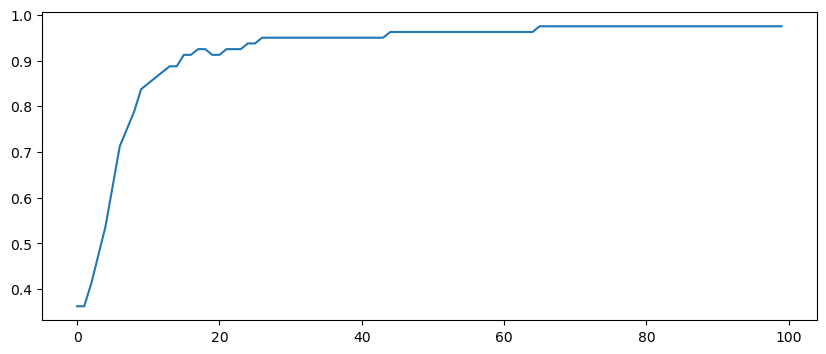

In [37]:
plt.figure(figsize = (10,4))
plt.plot(history.history['accuracy'],label = "Training Accuracy")